In [1]:
# Logistic Regression Implementation for Assignment 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
X = pd.read_csv('logisticX.csv', header=None).values  # Independent variables
y = pd.read_csv('logisticY.csv', header=None).values  # Dependent variable
y = y.flatten()  # Convert to 1D array

# Normalize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add an intercept term (bias)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    return -(1/m) * (y @ np.log(h) + (1 - y) @ np.log(1 - h))

# Gradient descent
def gradient_descent(X, y, alpha, num_iterations):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    
    for _ in range(num_iterations):
        gradient = (1/m) * (X.T @ (sigmoid(X @ theta) - y))
        theta -= alpha * gradient
        cost_history.append(compute_cost(theta, X, y))
    
    return theta, cost_history

# Train the model
alpha = 0.1
num_iterations = 1000
theta, cost_history = gradient_descent(X, y, alpha, num_iterations)

# Question 1: Final Cost
final_cost = cost_history[-1]
print("Final Cost:", final_cost)
print("Theta values:", theta)

Final Cost: 0.22910578679491778
Theta values: [ 0.32395465  2.38613663 -2.49462467]


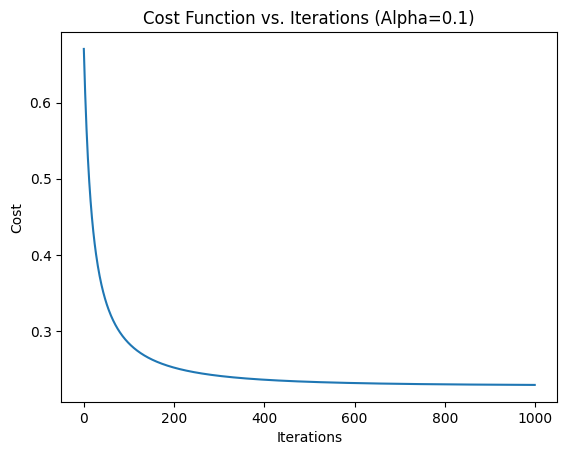

In [2]:
# Question 2: Plot cost function vs. iterations
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations (Alpha=0.1)")
plt.show()

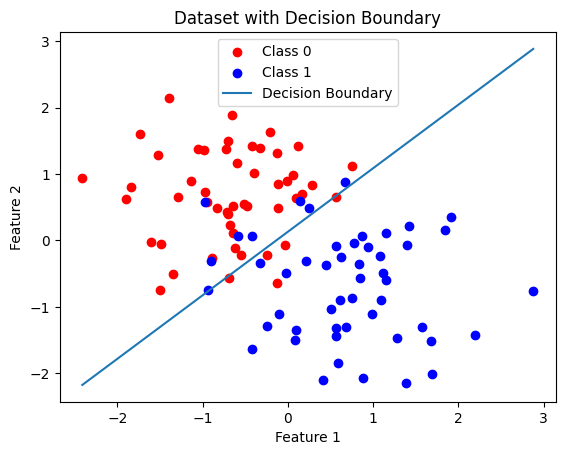

In [3]:
# Question 3: Plot dataset and decision boundary
plt.scatter(X[y == 0, 1], X[y == 0, 2], color='red', label='Class 0')
plt.scatter(X[y == 1, 1], X[y == 1, 2], color='blue', label='Class 1')

# Decision boundary
x_values = [min(X[:, 1]), max(X[:, 1])]
y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[2]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Dataset with Decision Boundary")
plt.show()

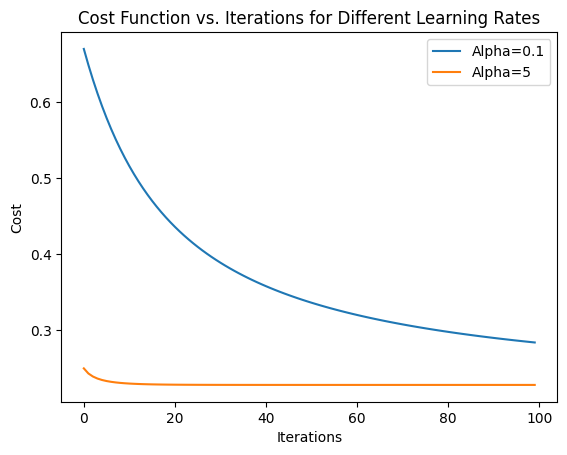

In [4]:
# Question 4: Compare learning rates
alpha1, alpha2 = 0.1, 5
iterations = 100
_, cost_history1 = gradient_descent(X, y, alpha1, iterations)
_, cost_history2 = gradient_descent(X, y, alpha2, iterations)

plt.plot(range(iterations), cost_history1, label=f"Alpha={alpha1}")
plt.plot(range(iterations), cost_history2, label=f"Alpha={alpha2}")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.show()

In [5]:
# Question 5: Confusion matrix and performance metrics
def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

y_pred = predict(X, theta)

# Confusion Matrix
tp = np.sum((y_pred == 1) & (y == 1))
tn = np.sum((y_pred == 0) & (y == 0))
fp = np.sum((y_pred == 1) & (y == 0))
fn = np.sum((y_pred == 0) & (y == 1))

confusion_matrix = np.array([[tn, fp], [fn, tp]])
print("Confusion Matrix:\n", confusion_matrix)

# Performance metrics
accuracy = (tp + tn) / len(y)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

Confusion Matrix:
 [[45  5]
 [ 8 42]]
Accuracy: 0.87
Precision: 0.89
Recall: 0.84
F1-Score: 0.87
